In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error

from power_laws import *

In [2]:
# load the merged dataset of placental mammals 
# i.e. leaving out marsupials and monotremes,
# which are not commonly used as livestock.
mammals_df = pd.read_csv('../data/merged_animal_traits_placental_only.csv')

# Load the cleaned data from the UN FAO DAD-IS DB. 
# See 0_preprocess_FAO_data.ipynb for the mild cleanup logic
#  - mostly dropping empty rows, replacing values with NaN. 
# Domestic Animal Diversity Information System (DAD-IS)
dad_is_df = pd.read_csv('../data/FAO_DAD-IS_cleaned.csv')

No handles with labels found to put in legend.


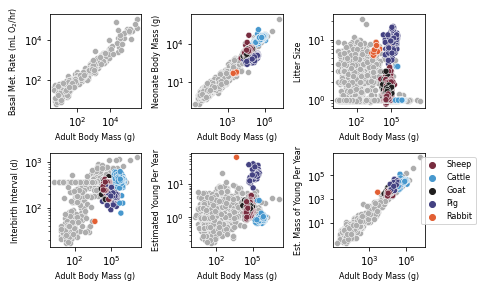

In [3]:
cols2plot_mammals = ['BasalMetabolicRate (mLO2hr)', 'NeonateBodyMass (g)', 'LitterSize (number)', 'InterbirthInterval (d)',
                     'YoungPerYear_Estimated (number)', 'YoungMassPerYear_Estimated (g)']
cols2plot_dad_is = [None, 'Birth weight AVG (g)', 'Litter size AVG (number)', 'Parturition interval AVG (d)',
                    'Young per year AVG (number)', 'Young mass per year AVG (g)']

pretty_names_mammals = ['Basal Met. Rate (mL O$_2$/hr)', 'Neonate Body Mass (g)', 'Litter Size',
                        'Interbirth Interval (d)', 'Estimated Young Per Year', 'Est. Mass of Young Per Year']
dad_is_species2plot = 'Cattle,Pig,Goat,Sheep,Rabbit'.split(',')
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(7,4))
flat_axs = axs.flatten()
greys = sns.color_palette('Greys')
pal = sns.color_palette('icefire', n_colors=5)
my_pal = dict(zip(dad_is_species2plot,pal))

xcol_mammals = 'AdultBodyMass (g)'
xcol_dad_is = 'Adult weight AVG (g)'
for i, (my_ax, ycol_mammals) in enumerate(zip(flat_axs, cols2plot_mammals)):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(mammals_df[xcol_mammals] > 0,
                          mammals_df[ycol_mammals] > 0)
    sub_df = mammals_df[mask]
    sns.scatterplot(data=sub_df, x=xcol_mammals, y=ycol_mammals, legend=False,
                    color=greys[2])
    
    ycol_dad_is = cols2plot_dad_is[i]
    if ycol_dad_is:
        mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                              dad_is_df[ycol_dad_is] > 0)
        mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
        sub_df = dad_is_df[mask]
        sns.scatterplot(data=sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                        palette=my_pal)
    
    plt.legend().set_visible(False)
    plt.xlabel('Adult Body Mass (g)', fontsize=8)
    plt.ylabel(pretty_names_mammals[i], fontsize=8)

plt.legend(fontsize=8, loc=1, bbox_to_anchor=(1.6, 1)).set_visible(True)

plt.tight_layout()
plt.savefig('../figures/merged_allometries.png', dpi=600, facecolor='w')
plt.show()

In [9]:
# Load the data from Savage et al 2004.
savage_df = pd.read_excel('../data/savage2004_BMR.xlsx')
print(savage_df.shape)
savage_df.head(5)

(1006, 10)


,order,family,species,mass_g,BMR_W,BMR_MJ_per_day,species_average_mass_g,species_average_BMR_W,species_average_BMR_MJ_per_day,ref
0,Artiodactyla,Antilocapridae,Antilocapra americana,32000.0,49.984,4.318618,34 779.3,50.973,4.404067,Lovegrove (2000)
1,Artiodactyla,Antilocapridae,Antilocapra americana,37800.0,51.981,4.491158,NaN,NaN,0.000000,White & Seymour (2003)
2,Artiodactyla,Bovidae,Bos taurus,347000.0,306.770,26.504928,347 000.0,306.770,26.504928,Heusner (1991)
3,Artiodactyla,Bovidae,Cephalophus monticola,4200.0,10.075,0.870480,4 200.0,10.075,0.870480,Lovegrove (2000)
4,Artiodactyla,Bovidae,Connochaetes taurinus,196500.0,230.073,19.878307,196 500.0,230.073,19.878307,"White & Seymour (2003), Rogerson (1968)"


<AxesSubplot:xlabel='mass_g', ylabel='BMR_W'>

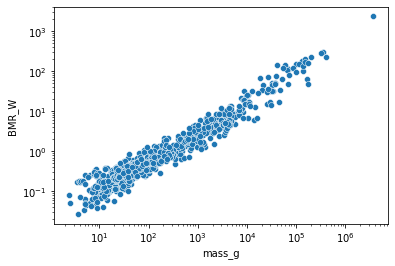

In [5]:
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=savage_df, x='mass_g', y='BMR_W')

In [6]:
mask = np.logical_and(savage_df.BMR_W > 0, savage_df.mass_g > 0)
savage_df[mask]

,order,family,species,mass_g,BMR_W,BMR_MJ_per_day,species_average_mass_g,species_average_BMR_W,species_average_BMR_MJ_per_day,ref
0,Artiodactyla,Antilocapridae,Antilocapra americana,32000.0,49.984,4.318618,34 779.3,50.973,4.404067,Lovegrove (2000)
1,Artiodactyla,Antilocapridae,Antilocapra americana,37800.0,51.981,4.491158,NaN,NaN,0.000000,White & Seymour (2003)
2,Artiodactyla,Bovidae,Bos taurus,347000.0,306.770,26.504928,347 000.0,306.770,26.504928,Heusner (1991)
3,Artiodactyla,Bovidae,Cephalophus monticola,4200.0,10.075,0.870480,4 200.0,10.075,0.870480,Lovegrove (2000)
4,Artiodactyla,Bovidae,Connochaetes taurinus,196500.0,230.073,19.878307,196 500.0,230.073,19.878307,"White & Seymour (2003), Rogerson (1968)"
...,...,...,...,...,...,...,...,...,...,...
1001,Xenarthra,Myrmecophagidae,Myrmecophaga tridactyla,30600.0,14.543,1.256515,30 600.0,14.543,1.256515,White & Seymour (2003)
1002,Xenarthra,Myrmecophagidae,Tamandua mexicana,3500.0,5.077,0.438653,3 884.2,5.124,0.442714,Lovegrove (2000)
1003,Xenarthra,Myrmecophagidae,Tamandua mexicana,3977.0,5.534,0.478138,NaN,NaN,0.000000,White & Seymour (2003)
1004,Xenarthra,Myrmecophagidae,Tamandua mexicana,4210.0,4.790,0.413856,NaN,NaN,0.000000,Heusner (1991)


NameError: name 'pantheria_df' is not defined

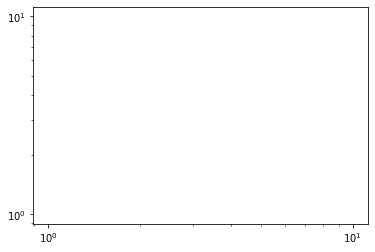

In [7]:
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=pantheria_df, x=xcol_pantheria, y='YoungMassPerYear_Estimated (g)')

ycol_dad_is = 'Young mass per year AVG (g)'
mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                     dad_is_df[ycol_dad_is] > 0)
mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
sub_df = dad_is_df[mask]
sns.scatterplot(data=sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                palette=my_pal)

In [ ]:
cols2plot_pantheria = ['NeonateBodyMass (g)', 'YoungPerYear_Estimated (number)', 'YoungMassPerYear_Estimated (g)']
cols2plot_dad_is = ['Birth weight AVG (g)', 'Young per year AVG (number)', 'Young mass per year AVG (g)']

pretty_names_pantheria = ['Neonate Body Mass (g)', 'Est. Young Per Year', 'Est. Young Mass Rate (g/yr)']
do_fitting = [True, False, True]
dad_is_species2plot = 'Cattle,Pig,Goat,Sheep,Rabbit'.split(',')

fig, axs = plt.subplots(ncols=3, figsize=(8,2.5))
flat_axs = axs.flatten()
pal = sns.color_palette('dark', n_colors=6)[1:]
my_pal = dict(zip(dad_is_species2plot,pal))

xcol_pantheria = 'AdultBodyMass (g)'
xcol_dad_is = 'Adult weight AVG (g)'
for i, (my_ax, ycol_pantheria) in enumerate(zip(flat_axs, cols2plot_pantheria)):
    plt.sca(my_ax)
    plt.xscale('log')
    plt.yscale('log')
    
    mask = np.logical_and(pantheria_df[xcol_pantheria] > 0,
                          pantheria_df[ycol_pantheria] > 0)
    pantheria_sub_df = pantheria_df[mask]
    sns.scatterplot(data=pantheria_sub_df, x=xcol_pantheria, y=ycol_pantheria,
                    hue='PlacentalMammal', palette=['grey', 'cornflowerblue'],
                    legend=False)
    
    ycol_dad_is = cols2plot_dad_is[i]
    mask = np.logical_and(dad_is_df[xcol_dad_is] > 0,
                          dad_is_df[ycol_dad_is] > 0)
    mask = np.logical_and(mask, dad_is_df.Specie.isin(dad_is_species2plot))
    dad_is_sub_df = dad_is_df[mask]
    sns.scatterplot(data=dad_is_sub_df, x=xcol_dad_is, y=ycol_dad_is, hue='Specie',
                    palette=my_pal)

    plt.legend().set_visible(False)
    plt.xlabel('Adult Body Mass (g)', fontsize=8)
    plt.ylabel(pretty_names_pantheria[i], fontsize=8)
    
    if not do_fitting[i]:
        continue
        
    # fit power law to the placental mammals (from pantheria) 
    eutheria_data = pantheria_sub_df[pantheria_sub_df.PlacentalMammal == True]

    # Note: power-law fitting code assumes log base e by exponentiating the fit intercept
    xs = eutheria_data[xcol_pantheria]
    ys = eutheria_data[ycol_pantheria]
    log_xs, log_ys = np.log(xs), np.log(ys)
    exp, pre, r = fit_power_law_odr(log_xs, log_ys)
    ys_pantheria_pred = np.power(xs, exp)*pre
    mape_pantheria = mean_absolute_percentage_error(ys, ys_pantheria_pred)
    
    # Evaluate goodness of fit on the livestock data
    xs_dad_is = dad_is_sub_df[xcol_dad_is]
    ys_dad_is = dad_is_sub_df[ycol_dad_is]
    ys_dad_is_pred = np.power(xs_dad_is, exp)*pre
    mape_livestock = mean_absolute_percentage_error(ys_dad_is, ys_dad_is_pred)
    
    t = plt.text(0.05, 0.9, '$MPE_w = {0:.2f}, MPE_l = {1:.2f}$'.format(mape_pantheria, mape_livestock),
                 fontsize=8, transform=my_ax.transAxes, backgroundcolor='w')
    t.set_bbox(dict(facecolor='w', alpha=0.7, edgecolor='grey'))

plt.legend(fontsize=8, loc=1, bbox_to_anchor=(1.6, 1)).set_visible(True)

plt.tight_layout()
plt.savefig('../figures/young_mass_per_year.png', dpi=600, facecolor='w')
plt.show()

In [ ]:
ys.isnull().any()